In [ ]:
pip  install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
pip install sklearn-pandas

# Importing all important lybraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from feature_engine.imputation import RandomSampleImputer
from sklearn.feature_selection import VarianceThreshold
import scipy.stats as stats
import pylab
from sklearn.preprocessing import StandardScaler

# importing warnings

so my codes run properly without any warning

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# reading csv

In [ ]:
df= pd.read_csv("Zudio_sales_data.csv")

In [ ]:
df.head()

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0


In [ ]:
df.shape

(7899, 28)

In [ ]:
df.dtypes

,0
Store,object
Country,object
State,object
City,object
Category,object
Clothing Type,object
Store Number,int64
Postal Code,int64
Store Type,object
Store Open Date,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      7899 non-null   object 
 1   Country                    7899 non-null   object 
 2   State                      7899 non-null   object 
 3   City                       7899 non-null   object 
 4   Category                   7899 non-null   object 
 5   Clothing Type              7899 non-null   object 
 6   Store Number               7899 non-null   int64  
 7   Postal Code                7899 non-null   int64  
 8   Store Type                 7899 non-null   object 
 9   Store Open Date            7899 non-null   object 
 10  Selling Area Size (sq ft)  7899 non-null   int64  
 11  Store Manager              7899 non-null   object 
 12  Manager ID                 7899 non-null   object 
 13  Store Address              7899 non-null   objec

df.info gives the count of data types

The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [ ]:
df.describe()

,Store Number,Postal Code,Selling Area Size (sq ft),Staff Count,Order ID,Customer ID,Product ID,Price,Quantity,Sales Profit
count,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000
mean,50.666034,419982.374984,1112.077478,11.504747,54920.719965,549440.714521,602.069376,1761.113432,4.519433,3170.671376
std,29.095274,11695.237817,193.239371,5.194722,25894.206850,262418.912565,232.066189,716.269447,2.292373,2141.249886
min,1.000000,400006.000000,800.000000,3.000000,10008.000000,100153.000000,204.000000,499.000000,1.000000,200.400000
25%,25.000000,409841.000000,950.000000,7.000000,33192.000000,318516.500000,398.000000,1136.000000,3.000000,1411.200000
50%,51.000000,419988.000000,1100.000000,12.000000,54873.000000,546012.000000,602.000000,1782.000000,5.000000,2681.600000
75%,76.000000,430258.000000,1300.000000,16.000000,77285.000000,780304.000000,803.500000,2373.000000,7.000000,4570.400000
max,100.000000,439985.000000,1400.000000,20.000000,99999.000000,999858.000000,999.000000,2999.000000,8.000000,9596.800000


# Data cleaning

checking for duplicate values

In [ ]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the number of missing values.

In [ ]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)


Number of Missing Values

 Store                        0
Country                      0
State                        0
City                         0
Category                     0
Clothing Type                0
Store Number                 0
Postal Code                  0
Store Type                   0
Store Open Date              0
Selling Area Size (sq ft)    0
Store Manager                0
Manager ID                   0
Store Address                0
Contact Information          0
Operating Hours              0
Staff Count                  0
Parking Availability         0
Security Features            0
Order ID                     0
Order Date                   0
Month                        0
Customer ID                  0
Customer Name                0
Product ID                   0
Price                        0
Quantity                     0
Sales Profit                 0
dtype: int64


In [ ]:
df.dropna(inplace=True)

Checking the number of unique values of each variable.

In [ ]:
df.nunique()

,0
Store,1
Country,1
State,8
City,42
Category,3
Clothing Type,11
Store Number,100
Postal Code,5448
Store Type,2
Store Open Date,1732


As some of the rows were removed there are some values missing in the index so reseting the index.

In [ ]:
df.reset_index(inplace=True)
df.head(10)

,index,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0
5,5,Zudio,India,West Bengal,Nashik,Kids,Jackets,71,417269,Owned,...,CCTV,78800,2024-04-25,April,326466,James Bennett,295,2206,4,3529.6
6,6,Zudio,India,Maharashtra,Lucknow,Kids,Jackets,44,439184,Rented,...,CCTV,43329,2024-06-19,June,724817,Benjamin Barrett,222,2848,4,4556.8
7,7,Zudio,India,West Bengal,Hyderabad,Women,Tops,74,417964,Owned,...,CCTV,23062,2024-06-11,June,870587,Matthew Cervantes,595,1694,8,5420.8
8,8,Zudio,India,Karnataka,Ahmedabad,Men,Shoes,71,414510,Rented,...,"CCTV, Alarm",72223,2024-01-24,January,790306,Shelley Lopez,243,2024,1,809.6
9,12,Zudio,India,Maharashtra,Faridabad,Kids,Pants,5,408436,Rented,...,Alarm,97711,2024-05-17,May,716554,Bruce Leonard,740,2592,5,5184.0


Removing the columns which are not required as they are not useful for analysis.

In [ ]:
df.drop(['City','Clothing Type','Store Open Date','Security Features',],axis=1,inplace=True)
df.head(5)

,Store,Country,State,Category,Store Number,Postal Code,Store Type,Selling Area Size (sq ft),Store Manager,Manager ID,...,Parking Availability,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Women,30,411084,Owned,950,Lori Hill,M77,...,Not Available,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Kids,48,404562,Owned,1200,Deborah Jackson,M89,...,Not Available,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Men,97,437773,Rented,1100,Adam Anderson,M71,...,Not Available,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Women,93,431725,Owned,1400,Anthony Smith,M40,...,Not Available,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Men,51,415370,Owned,1400,Matthew Romero,M24,...,Not Available,58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0


# statistical analyzing

Mean,meadian,mode

In [ ]:
df[['Customer ID','Product ID','Quantity']].mean()

,0
Customer ID,551773.018598
Product ID,601.864016
Quantity,4.483535


In [ ]:
df[['Store Number','Order ID','Customer ID','Product ID','Price']].median()

,0
Store Number,51.0
Order ID,55017.0
Customer ID,550298.0
Product ID,600.0
Price,1779.0


In [ ]:
df.mode()

,Store,Country,State,Category,Store Number,Postal Code,Store Type,Selling Area Size (sq ft),Store Manager,Manager ID,...,Parking Availability,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Delhi,Kids,13.0,402535.0,Rented,1400.0,Michael Smith,M41,...,Not Available,26756.0,2024-08-28,October,108755.0,Christopher Smith,970.0,1213.0,4.0,2700.0
1,NaN,NaN,NaN,NaN,NaN,403602.0,NaN,NaN,Michael Thompson,NaN,...,NaN,37045.0,NaN,NaN,329837.0,NaN,NaN,1291.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,409104.0,NaN,NaN,NaN,NaN,...,NaN,38238.0,NaN,NaN,366506.0,NaN,NaN,1329.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,411273.0,NaN,NaN,NaN,NaN,...,NaN,60208.0,NaN,NaN,499296.0,NaN,NaN,1667.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,411781.0,NaN,NaN,NaN,NaN,...,NaN,64790.0,NaN,NaN,508082.0,NaN,NaN,2371.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


calculating Variance, Standard Deviation

In [ ]:
df[['Store Number','Order ID','Customer ID','Product ID','Price']].var()

,0
Store Number,8.534110e+02
Order ID,6.734938e+08
Customer ID,6.834837e+10
Product ID,5.370270e+04
Price,5.108051e+05


In [ ]:
df[['Store Number','Order ID','Customer ID','Product ID','Price']].std()

,0
Store Number,29.213200
Order ID,25951.758277
Customer ID,261435.203072
Product ID,231.738428
Price,714.706314


# GRAPHICAL REPRESENTATION

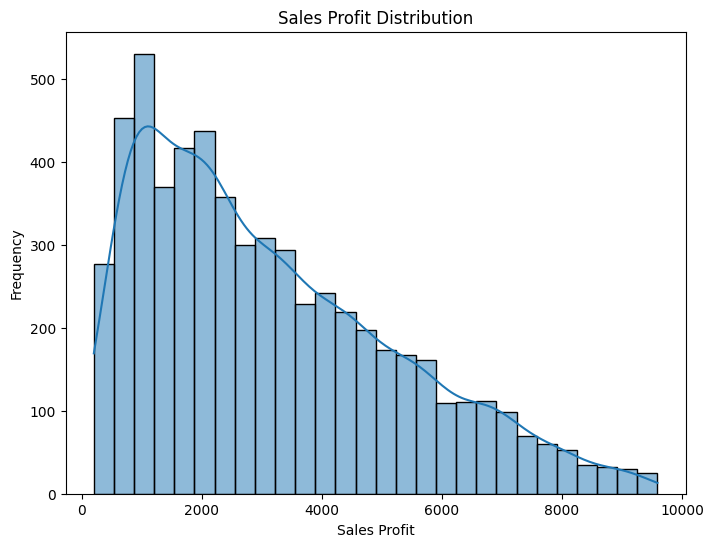

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales Profit'], kde=True)
plt.title('Sales Profit Distribution')
plt.xlabel('Sales Profit')
plt.ylabel('Frequency')
plt.show()

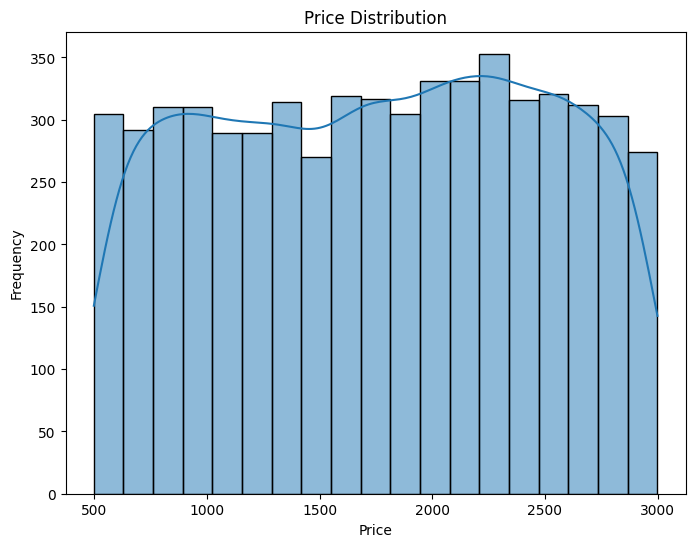

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

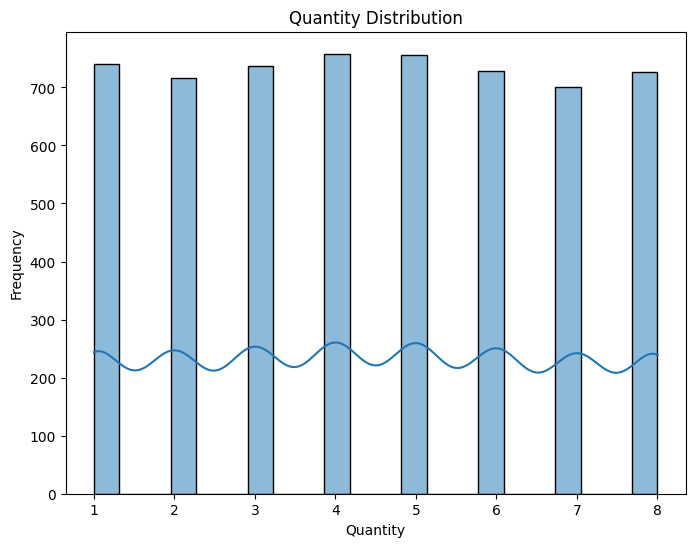

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

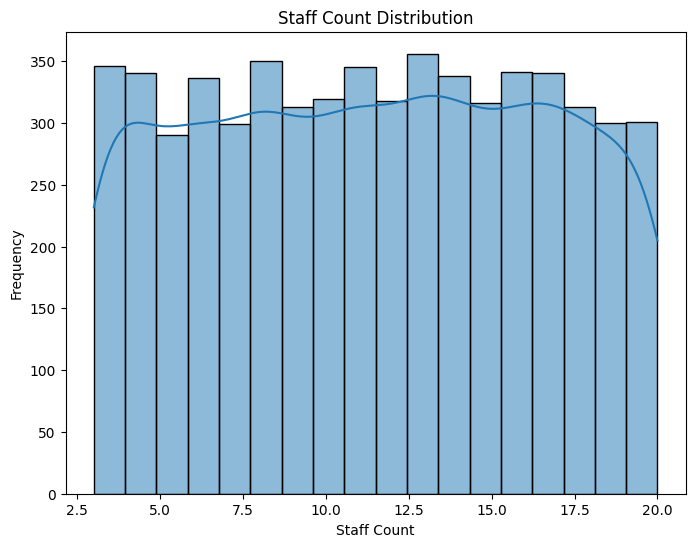

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Staff Count'], kde=True)
plt.title('Staff Count Distribution')
plt.xlabel('Staff Count')
plt.ylabel('Frequency')
plt.show()

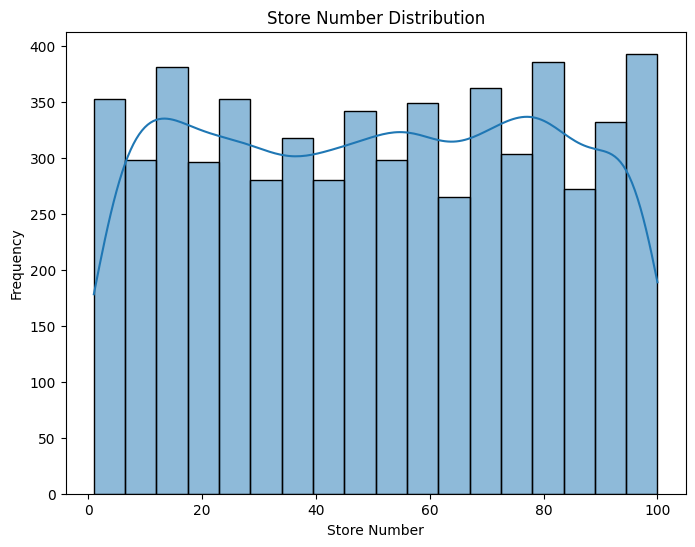

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Store Number'], kde=True)
plt.title('Store Number Distribution')
plt.xlabel('Store Number')
plt.ylabel('Frequency')
plt.show()

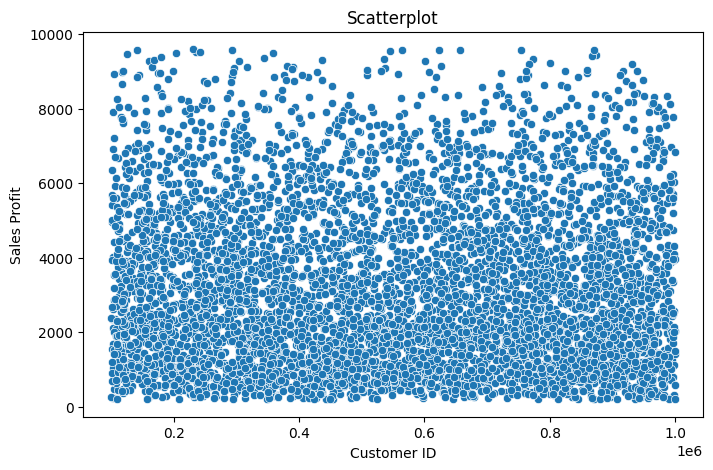

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Customer ID', y='Sales Profit', data=df)
plt.title("Scatterplot")
plt.show()

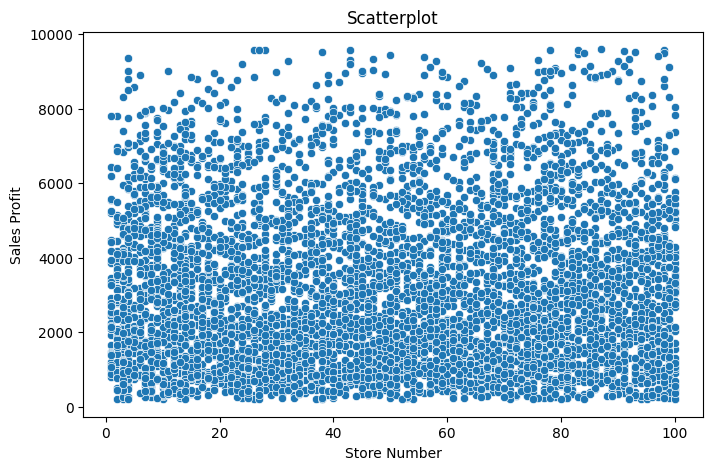

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Store Number', y='Sales Profit', data=df)
plt.title("Scatterplot")
plt.show()

<Axes: ylabel='Selling Area Size (sq ft)'>

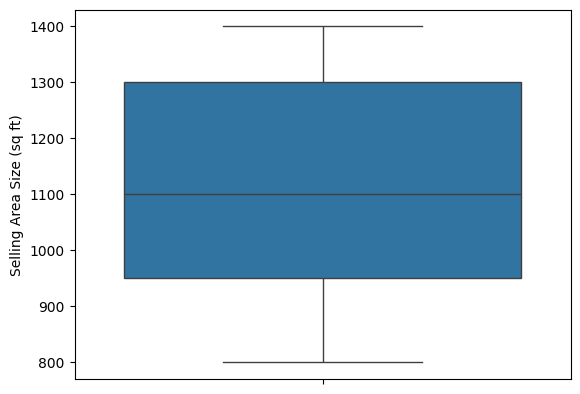

In [ ]:
sns.boxplot(df['Selling Area Size (sq ft)'])

<Axes: ylabel='Price'>

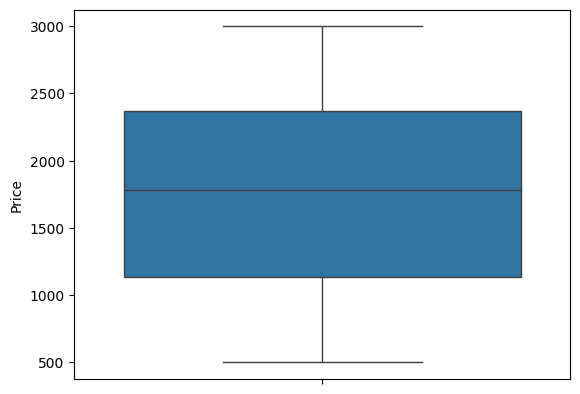

In [ ]:
sns.boxplot(df['Price'])

<Axes: ylabel='Sales Profit'>

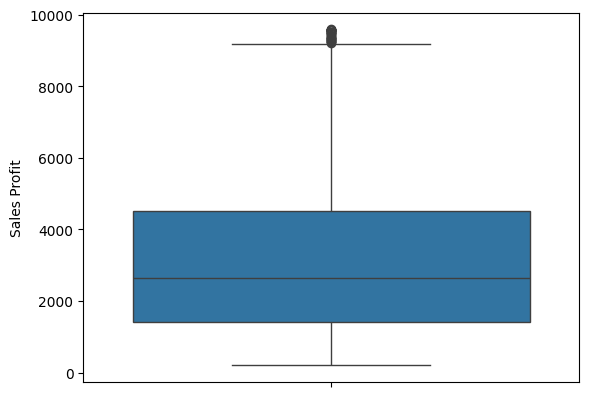

In [ ]:
sns.boxplot(df['Sales Profit'])

In [ ]:
from wordcloud import WordCloud

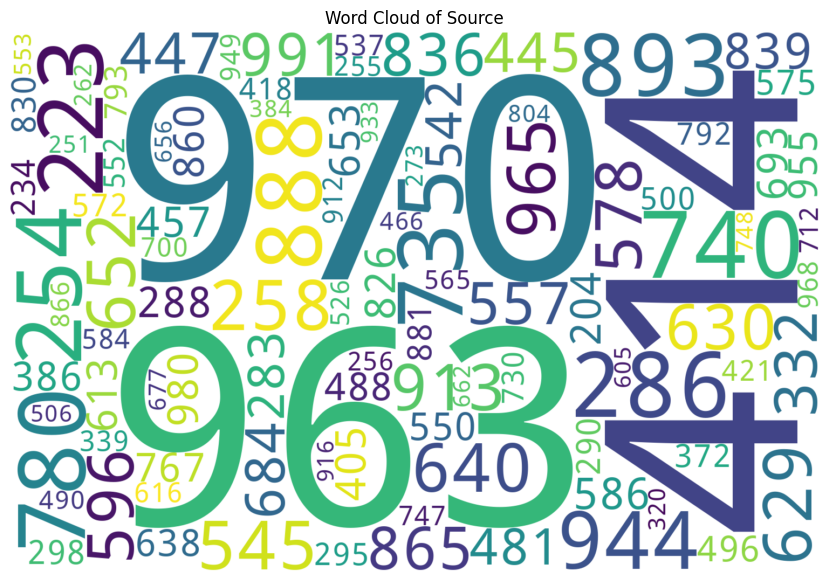

In [ ]:
data = df['Product ID'].value_counts().to_dict()
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(background_color='White',max_words=WC_max_words, height=WC_height, width=WC_width)

data = {str(k): v for k, v in data.items()}
wordCloud.generate_from_frequencies(data)
plt.figure(figsize=(15,7))
plt.title('Word Cloud of Source')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.head()

,Store,Country,State,Category,Store Number,Postal Code,Store Type,Selling Area Size (sq ft),Store Manager,Manager ID,...,Parking Availability,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Women,30,411084,Owned,950,Lori Hill,M77,...,Not Available,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Kids,48,404562,Owned,1200,Deborah Jackson,M89,...,Not Available,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Men,97,437773,Rented,1100,Adam Anderson,M71,...,Not Available,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Women,93,431725,Owned,1400,Anthony Smith,M40,...,Not Available,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Men,51,415370,Owned,1400,Matthew Romero,M24,...,Not Available,58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0


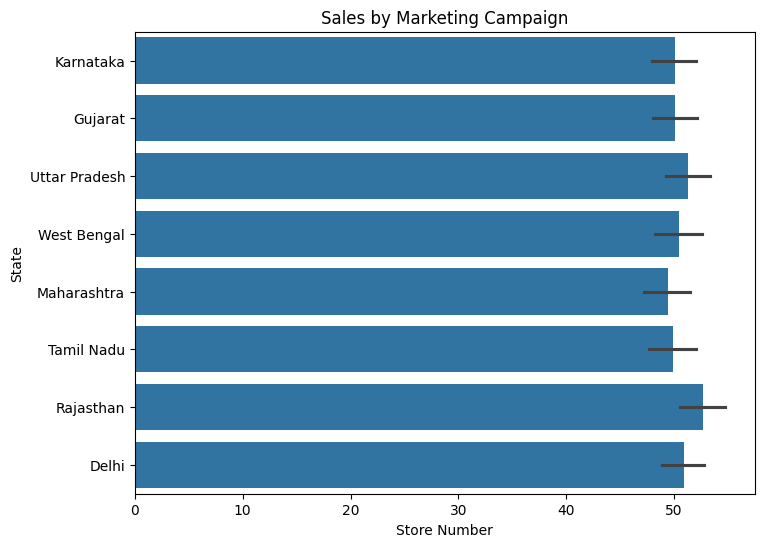

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Store Number', y='State')
plt.title('Sales by Marketing Campaign')
plt.xlabel('Store Number')
plt.ylabel('State')
plt.show()

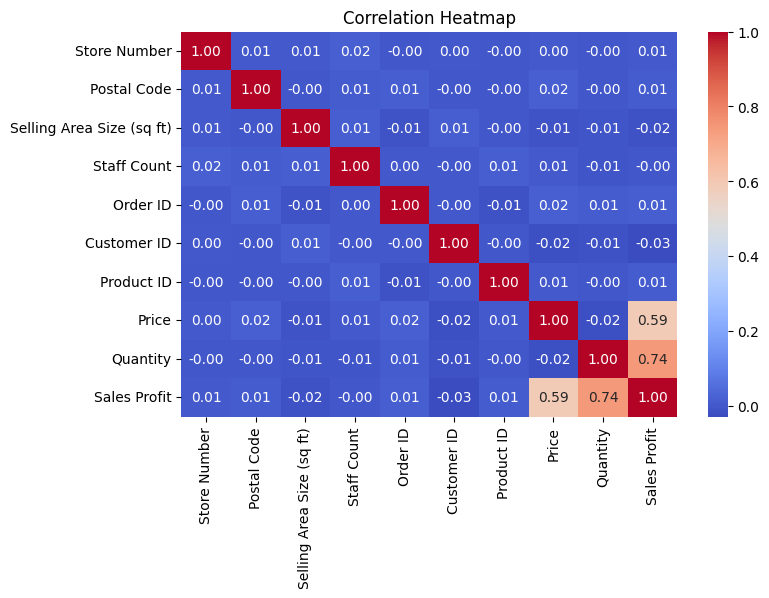

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()